Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

Read csv files and add new Columns

In [2]:
euro_50 = pd.read_csv("euro50.csv")
sp_500 = pd.read_csv("sp500.csv")

euro_50['Date'] = pd.to_datetime(euro_50['Date'], utc=True)
euro_50.insert(1, "DayWeek", 0)
euro_50.insert(2, "Month", 0)
euro_50.insert(3, "Year", 0)
euro_50.insert(4, "Ror", 0)

sp_500['Date'] = pd.to_datetime(sp_500['Date'], utc=True)
sp_500.insert(1, "DayWeek", 0)
sp_500.insert(2, "Month", 0)
sp_500.insert(3, "Year", 0)
sp_500.insert(4, "Ror", 0)

Add Date infomations

In [7]:
euro_50["Year"] = euro_50["Date"].apply(lambda x: x.year)
euro_50["Month"] = euro_50["Date"].apply(lambda x: x.month)
euro_50["DayWeek"] = euro_50["Date"].apply(lambda x: x.day_of_week)

euro_50["Ror"] =  euro_50["Close"].pct_change()

sp_500["Year"] = sp_500["Date"].apply(lambda x: x.year)
sp_500["Month"] = sp_500["Date"].apply(lambda x: x.month)
sp_500["DayWeek"] = sp_500["Date"].apply(lambda x: x.day_of_week)

sp_500["Ror"] =  sp_500["Close"].pct_change()

Monthly percentage return (intended over 20 trading days) and annual (intended over 252 trading days), divided by index

                         Date  DayWeek  Month  Year       Ror         Open   
0   2014-04-14 22:00:00+00:00        0      4  2014       NaN  3130.149902  \
1   2014-04-15 22:00:00+00:00        1      4  2014  0.015442  3116.459961   
2   2014-04-16 22:00:00+00:00        2      4  2014  0.005272  3140.120117   
3   2014-04-21 22:00:00+00:00        0      4  2014  0.013904  3161.689941   
4   2014-04-22 22:00:00+00:00        1      4  2014 -0.007413  3197.389893   
..                        ...      ...    ...   ...       ...          ...   
171 2014-12-17 23:00:00+00:00        2     12  2014  0.033349  3080.459961   
172 2014-12-18 23:00:00+00:00        3     12  2014 -0.003960  3170.860107   
173 2014-12-21 23:00:00+00:00        6     12  2014  0.004339  3150.310059   
174 2014-12-22 23:00:00+00:00        0     12  2014  0.011905  3162.270020   
175 2014-12-29 23:00:00+00:00        0     12  2014 -0.017704  3171.199951   

            High          Low        Close     Volume  
0    31

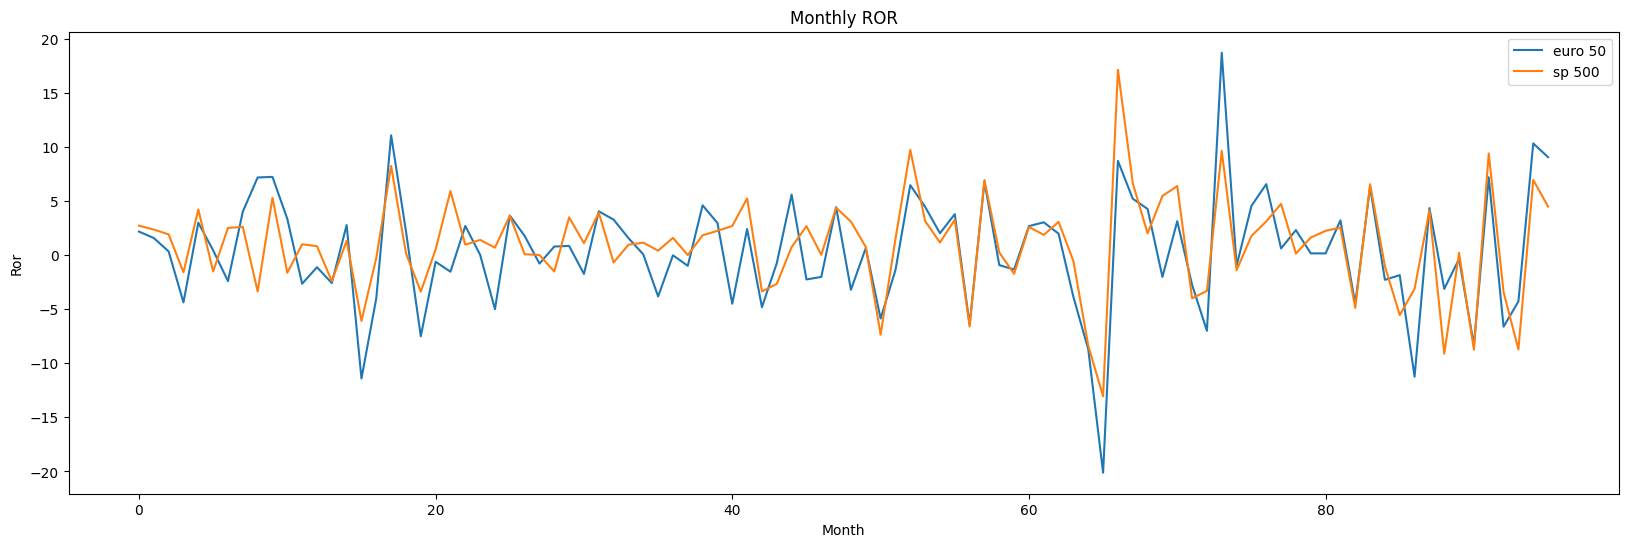

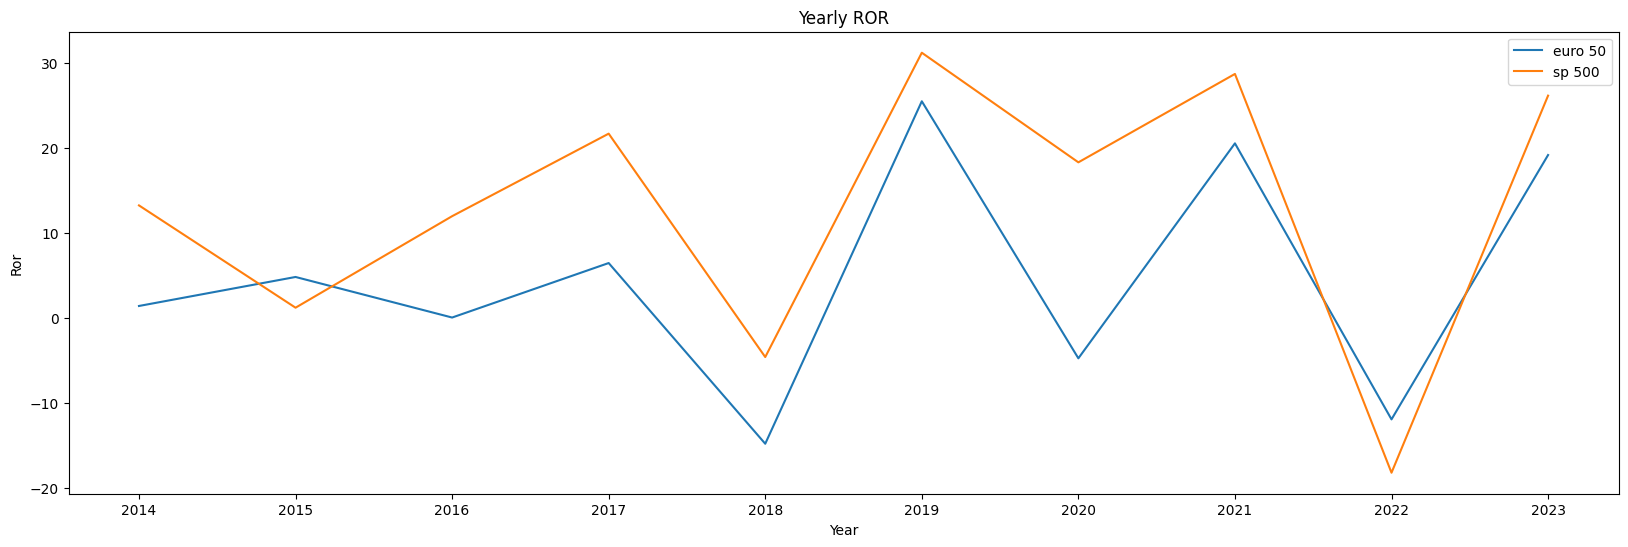

In [33]:
ror_month_euro_50 = []
ror_year_euro_50 = []
ror_month_sp_500 = []
ror_year_sp_500 = []

euro_50_first_close = euro_50['Close'][0]
sp_500_first_close = sp_500['Close'][0]


for index_year in range(10):

    """
    Annual Percentage Return
    1. Filter datas for every year and reset index 
    2. Starting from the first day we have valid datas (in the first year the datas don't start from 1st of January)
    3. Calculate the ror using the opening of first day instead the closing of the previous day to work only with data inside single year
    4. Append ror in a new dataframe 
    5. Repeat the calculation for both index  
    """
    
    if index_year > 0:
        euro_50_Filtered_year_previous = euro_50_year_Filtered
        print(euro_50_Filtered_year_previous)
        dim_year_previous = dim_year
        sp_500_Filtered_year_previous = sp_500_year_Filtered
        dim1_year_previous = dim1_year
    
    euro_50_year_Filtered = euro_50[euro_50['Year'] == index_year + 2014]
    euro_50_year_Filtered = euro_50_year_Filtered.reset_index(drop=True)
    
    sp_500_year_Filtered = sp_500[sp_500['Year'] == index_year + 2014]
    sp_500_year_Filtered = sp_500_year_Filtered.reset_index(drop=True)
   
    dim_year = len(euro_50_year_Filtered) - 1
    dim1_year = len(sp_500_year_Filtered) - 1
          
    if index_year == 0:
        
        ror_act = float(100 * (euro_50_year_Filtered["Close"][dim_year] - euro_50_first_close) / euro_50_first_close)
        ror_year_euro_50.append(ror_act)
        
        ror_act = float(100 * (sp_500_year_Filtered["Close"][dim1_year] - sp_500_first_close) / sp_500_first_close)
        ror_year_sp_500.append(ror_act)
        
    else:
        ror_act = float(100 * (euro_50_year_Filtered["Close"][dim_year] - euro_50_Filtered_year_previous["Close"][dim_year_previous]) / euro_50_Filtered_year_previous["Close"][dim_year_previous])
        ror_year_euro_50.append(ror_act)
        
        ror_act = float(100 * (sp_500_year_Filtered["Close"][dim1_year] - sp_500_Filtered_year_previous["Close"][dim1_year_previous]) / sp_500_Filtered_year_previous["Close"][dim1_year_previous])
        ror_year_sp_500.append(ror_act)
    
    for index_month in range(12):
        
        """
        Montly Percentage Return
        1. use the same loop even for the second calculation in this case with a second loop to reach every month inside every yeat
        2. Filter datas for every year and reset index 
        3. Starting from the first day we have valid datas (in the first year the datas don't start from 1st of January)
        4. Calculate the ror using the opening of first day instead the closing of the previous day to work only with data inside single year
        5. Append ror in a new dataframe 
        6. Repeat the calculation for both index  
        """
        
        euro_50_Filtered = euro_50[(euro_50['Month'] == index_month) & (euro_50['Year'] == index_year + 2013)]
        euro_50_Filtered = euro_50_Filtered.reset_index(drop=True)
        
        if len(euro_50_Filtered) > 0:
            
            dim = len(euro_50_Filtered) - 1
            ror_act = float(100 * (euro_50_Filtered["Close"][dim] - euro_50_Filtered["Open"][0]) / euro_50_Filtered["Open"][0])
            ror_month_euro_50.append(ror_act)
            
        sp_500_Filtered = sp_500[(sp_500['Month'] == index_month) & (sp_500['Year'] == index_year + 2013)]
        sp_500_Filtered = sp_500_Filtered.reset_index(drop=True)
        
        if len(sp_500_Filtered) > 0:
            
            dim1 = len(sp_500_Filtered) - 1
            ror_act = float(100 * (sp_500_Filtered["Close"][dim1] - sp_500_Filtered["Open"][0]) / sp_500_Filtered["Open"][0])
            ror_month_sp_500.append(ror_act)
        

"""
Montly percentage Plot    
"""

fig, ax = plt.subplots(figsize=(20,6))

ax.set_xlabel('Month')
ax.set_ylabel('Ror')
ax.set_title('Monthly ROR')

rect1, = ax.plot(ror_month_euro_50, label = "euro 50")
rect2, = ax.plot(ror_month_sp_500, label = "sp 500")

ax.legend()


"""
Yearly Percentage Plot    
"""

fig1, ax1 = plt.subplots(figsize=(20,6))
values = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

ax1.set_xlabel('Year')
ax1.set_ylabel('Ror')
ax1.set_title('Yearly ROR')

rect1_1 = ax1.plot(values, ror_year_euro_50, label = "euro 50")
rect2_1 = ax1.plot(values, ror_year_sp_500, label = "sp 500")
ax1.legend()

plt.show()

Average daily return divided by index and day of the week

[0.00066553, 0.00082529, -0.00054725, -4.277e-05, nan, nan, -0.00044667]
[0.00059428, -0.00029728, 0.00026018, 0.00045651, 0.00018292, nan, nan]


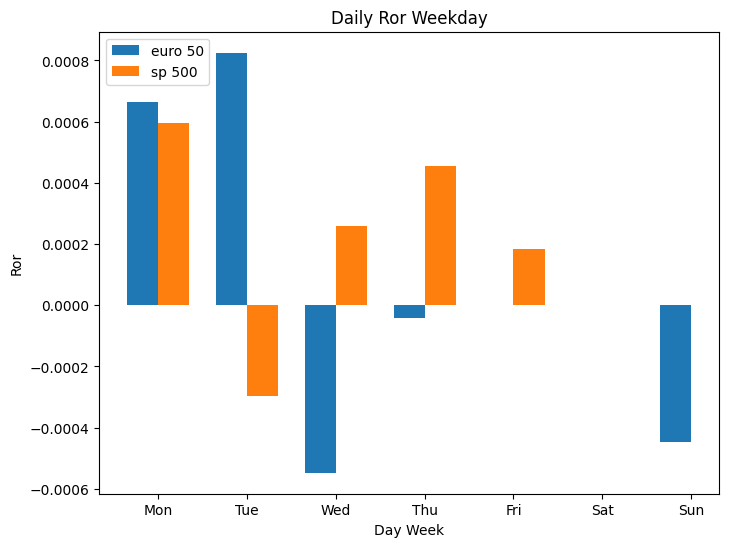

In [16]:
ror_dayweek_euro_50_mean = []
ror_dayweek_sp_500_mean = []

for index  in range(7):
    euro_50_Filtered = euro_50[(euro_50['DayWeek'] == index)]
    sp_500_Filtered = sp_500[(sp_500['DayWeek'] == index)]
    ror_dayweek_euro_50_mean.append(round(euro_50_Filtered["Ror"].mean(), 8))
    ror_dayweek_sp_500_mean.append(round(sp_500_Filtered["Ror"].mean(), 8))

print(ror_dayweek_euro_50_mean)    
print(ror_dayweek_sp_500_mean)  

"""
Plot    
"""

xval = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
yval_euro_50 = ror_dayweek_euro_50_mean
yval_sp_500 = ror_dayweek_sp_500_mean

x = np.arange(len(xval))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('Day Week')
ax.set_ylabel('Ror')
ax.set_title('Daily Ror Weekday')
ax.set_xticks(x, xval)

rect1 = ax.bar(x - width/2, yval_euro_50, width, label = "euro 50")
rect2 = ax.bar(x + width/2, yval_sp_500, width, label = "sp 500")

ax.legend()

plt.show()


Identify the day with the highest daily return and the lowest return, distinguished between the two indices

In [20]:
# euro50 
act_ror_bigger = euro_50["Ror"].max()
act_ror_lower_date = euro_50["Date"][euro_50["Ror"].idxmin()] 
string_date_low_euro50 = act_ror_lower_date.strftime("%d-%m-%Y")

act_ror_lower = euro_50["Ror"].min()
act_ror_bigger_date = euro_50["Date"][euro_50["Ror"].idxmax()] 
string_date_high_euro50 = act_ror_bigger_date.strftime("%d-%m-%Y")

print(f"il giorno con il rendimento peggiore per euro50 è {string_date_low_euro50} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per euro50 è {string_date_high_euro50} con un rendimento di {round(act_ror_bigger, 4)}")

# sp500 
act_ror_bigger = sp_500["Ror"].max()
act_ror_lower_date = sp_500["Date"][sp_500["Ror"].idxmin()] 
string_date_low_sp_500 = act_ror_lower_date.strftime("%d-%m-%Y")

act_ror_lower = sp_500["Ror"].min()
act_ror_bigger_date = sp_500["Date"][sp_500["Ror"].idxmax()] 
string_date_high_sp_500 = act_ror_bigger_date.strftime("%d-%m-%Y")
     
print(f"il giorno con il rendimento peggiore per sp_500 è {string_date_low_sp_500} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per sp_500 è {string_date_high_sp_500} con un rendimento di {round(act_ror_bigger, 4)}")

il giorno con il rendimento peggiore per euro50 è 11-03-2020 con un rendimento di -0.124
il giorno con il rendimento migliore per euro50 è 23-03-2020 con un rendimento di 0.0924
il giorno con il rendimento peggiore per sp_500 è 16-03-2020 con un rendimento di -0.1094
il giorno con il rendimento migliore per sp_500 è 24-03-2020 con un rendimento di 0.0906


Calculate the average daily volume of the two indices

In [13]:
mean_euro_50 = euro_50["Volume"].mean()
mean_sp_500_df = sp_500["Volume"].mean()

print(f"la media giornaliera per l'indice euro_50:  {round(mean_euro_50, 2)}") 
print(f"la media giornaliera per l'indice sp_500_df {round(mean_sp_500_df, 2)}") 

la media giornaliera per l'indice euro_50:  41934439.53
la media giornaliera per l'indice sp_500_df 91289037.89
